# Proyecto: 
## Investigación de la base de datos de películas de TMDb


### Introducción
En este proyecto de análisis de datos, exploraremos un archivo de base de datos de películas de TMDb, que cuenta con información importante de más de 10.000 películas, incluyendo detalles sobre presupuesto, ingresos, fechas de estreno, entre otros.

A lo largo de este análisis, utilizaremos diferentes herramientas y técnicas para explorar, visualizar y entender mejor los datos que contiene esta base de datos de películas. Exploraremos preguntas como ¿cuáles son las películas más populares? ¿Cuál es la relación entre el presupuesto y los ingresos de una película? ¿Cómo ha evolucionado la industria cinematográfica a lo largo del tiempo?

¡Prepárate para sumergirte en el mundo del cine y el análisis de datos con nosotros!

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/JuzerShakir/Investigate_TMDb_Movies/master/data.csv"
movie_data = pd.read_csv(url, encoding="utf-8")

pd.set_option("display.max_columns", None) # Ajustar el ancho de las columnas
print(movie_data.head(5))


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

Tipos de datos que tenemos

In [33]:
import pandas as pd

url = "https://raw.githubusercontent.com/JuzerShakir/Investigate_TMDb_Movies/master/data.csv"
movie_data = pd.read_csv(url, encoding="utf-8")

print(movie_data.dtypes)


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


Ver la cantidad de datos que tenemos

In [6]:
rows, col = movie_data.shape
print('En total hay {} peliculas y {} columnas en esta base.'.format(rows-1, col))


En total hay 10865 peliculas y 21 columnas en esta base.


Ver que columnas tienen mayor cantidad de nulls

<AxesSubplot: >

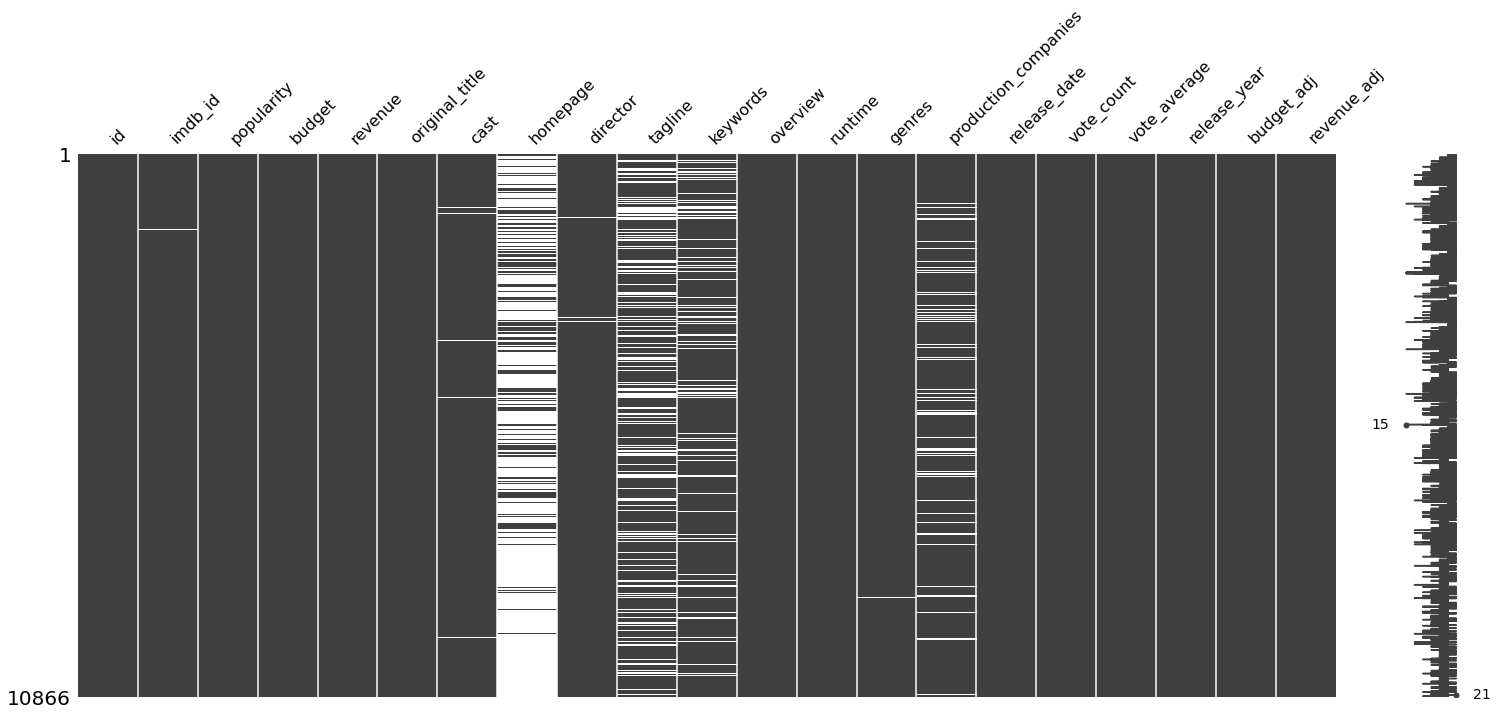

In [34]:
import pandas as pd
import missingno as msno

url = "https://raw.githubusercontent.com/JuzerShakir/Investigate_TMDb_Movies/master/data.csv"
movie_data = pd.read_csv(url, encoding="utf-8")

msno.matrix(movie_data)


Elimino 3 columnas que tienen demasiados nulls y que no soy útiles para el trabajo

In [25]:
movie_data = movie_data.drop(['homepage', 'tagline', 'keywords'], axis=1)


Realizamos limpieza de la base

In [35]:
#Creamos una lista de columnas a eliminar
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'overview', 'production_companies', 'vote_count', 'vote_average']

 
#Las eliminamos
movie_data = movie_data.drop(del_col, 1)
#miramos nuestra base de datos
movie_data.head(3)
print(movie_data)


          budget     revenue                original_title  \
0      150000000  1513528810                Jurassic World   
1      150000000   378436354            Mad Max: Fury Road   
2      110000000   295238201                     Insurgent   
3      200000000  2068178225  Star Wars: The Force Awakens   
4      190000000  1506249360                     Furious 7   
...          ...         ...                           ...   
10861          0           0            The Endless Summer   
10862          0           0                    Grand Prix   
10863          0           0           Beregis Avtomobilya   
10864          0           0        What's Up, Tiger Lily?   
10865      19000           0      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison

C:\Users\rodri\AppData\Local\Temp\ipykernel_22300\2912052796.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  movie_data = movie_data.drop(del_col, 1)


In [38]:
#Eliminamos los duplicados, dejando solo el primero
movie_data.drop_duplicates(keep = 'first', inplace = True)




Limpieza final

In [40]:
#Estas columnas hay que chequearlas
check_row = ['budget', 'revenue']

#Reemplazamos con 0 a los NaN
movie_data[check_row] = movie_data[check_row].replace(0, np.NaN)

movie_data.dropna(subset = check_row, inplace = True)

rows, col = movie_data.shape
print('Después de la limpieza, solo tenemos datos de {} peliculas.'.format(rows-1))

Después de la limpieza, solo tenemos datos de 3853 peliculas.


In [43]:
#Cambiamos el nombre de estas columnas
movie_data.rename(columns = {'budget' : 'budget_(in_US-Dollars)', 'revenue' : 'revenue_(in_US-Dollars)'}, inplace = True)

Insertar una nueva columna en la tabla movie_data llamada "profit_(in_US_Dollars)" que representa la ganancia en dólares estadounidenses de cada película. 

In [44]:
movie_data.insert(2, 'profit_(in_US_Dollars)', movie_data['revenue_(in_US-Dollars)'] - movie_data['budget_(in_US-Dollars)'])

movie_data['profit_(in_US_Dollars)'] = movie_data['profit_(in_US_Dollars)'].apply(np.int64)

movie_data.head(2)

,budget_(in_US-Dollars),revenue_(in_US-Dollars),profit_(in_US_Dollars),original_title,cast,homepage,director,tagline,keywords,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015
1,150000000.0,3.784364e+08,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,2015


In [45]:
movie_data.to_csv("clean_data.csv")




Función para calcular los valores más altos y más bajos de una columna en una base de datos de películas






In [46]:

def highest_lowest(column_name):
    
    #Más alto
    highest_id = movie_data[column_name].idxmax()
    highest_details = pd.DataFrame(movie_data.loc[highest_id])
    
    #Más bajo
    lowest_id = movie_data[column_name].idxmin()
    lowest_details = pd.DataFrame(movie_data.loc[lowest_id])
    
    #concadenando
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return two_in_one_data

#calling the function and passing the argument
highest_lowest('profit_(in_US_Dollars)')


,1386,2244
budget_(in_US-Dollars),237000000.0,425000000.0
revenue_(in_US-Dollars),2781505847.0,11087569.0
profit_(in_US_Dollars),2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.avatarmovie.com/,http://www.iamrogue.com/thewarriorsway
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100


Peliculas con mayor y menor duración

In [47]:
highest_lowest('runtime')

,2107,5162
budget_(in_US-Dollars),18000000.0,10.0
revenue_(in_US-Dollars),871279.0,5.0
profit_(in_US_Dollars),-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
homepage,NaN,NaN
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
keywords,gun|car bomb|tv mini-series|terrorism|opec,NaN
runtime,338,15
